In [24]:
import numpy as np
import pandas as pd
import json
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import plotly.express as px
import geoplot
import seaborn as sn
from matplotlib.colors import ListedColormap
from matplotlib import colormaps
sn.set()

## **Level 0:**

In [25]:

with open('Data/gadm41_VNM_0.json') as f:
    geo_data0 = json.load(f)
geo_data0.keys()

dict_keys(['type', 'name', 'crs', 'features'])

In [26]:
gdf_data0 = gpd.GeoDataFrame.from_features(geo_data0['features'])

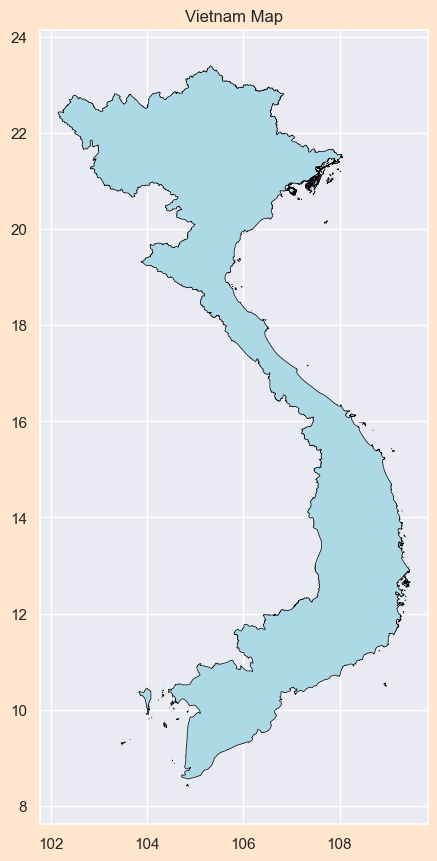

In [27]:
fig, ax = plt.subplots(figsize=(5, 20))
gdf_data0.plot(ax= ax, edgecolor='black', facecolor='lightblue', linewidth = 0.5)
plt.title('Vietnam Map')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

### **Add Truong Sa Hoang Sa**
The data of these islands comes from: [bản đồ các tỉnh của Việt Nam](https://vietnam.opendevelopmentmekong.net/vi/dataset?id=a-phn-tnh)

In [28]:
with open('Data/diaphantinhenglish.geojson', encoding='utf-8') as f:
    geo_data_0_1 = json.load(f)

In [29]:
khanh_hoa_coordinates = None
da_nang_coordinates = None

for feature in geo_data_0_1['features']:

    properties = feature['properties']
    name = properties['Name']
    # Do something with the name
    if name == 'Khanh Hoa' :
        khanh_hoa_coordinates = feature['geometry']['coordinates']
    elif name == 'Da Nang' :
        da_nang_coordinates = feature['geometry']['coordinates']

len(da_nang_coordinates)

24


- The coordinates of Truong Sa Island District in first 313 coordinates (may be) 28
- The coordinates of Da Nang district is the element at index 4, Hoang Sa Island are others

In [30]:
truong_sa_district = khanh_hoa_coordinates[:313]
hoang_sa_district = da_nang_coordinates[:4] + da_nang_coordinates[5:]

geo_data0['features'][0]['geometry']['coordinates'] += truong_sa_district
geo_data0['features'][0]['geometry']['coordinates'] += hoang_sa_district

### **Redraw the map with two islands:**

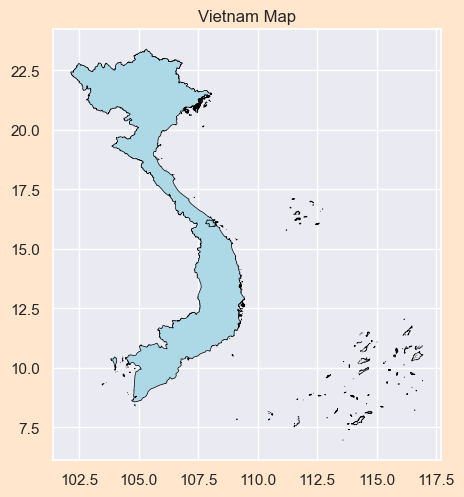

In [31]:
new_gdf_data0 = gpd.GeoDataFrame.from_features(geo_data0['features'])
fig, ax = plt.subplots(figsize=(5, 20))
new_gdf_data0.plot(ax= ax, edgecolor='black', facecolor='lightblue', linewidth = 0.5)
plt.title('Vietnam Map')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

In [32]:
with open('gadm41_VNM_0_1.json', "w") as file:
    json.dump(geo_data0, file)


In [33]:

m = folium.Map(location=[14.0583, 108.2772], zoom_start=6)

folium.GeoJson(geo_data0).add_to(m)

m.save("interactive_map.html")

## **LEVEL 1:**

In [34]:

with open('Data/diaphantinhenglish.geojson', encoding='utf-8') as f:
    geo_data1_1 = json.load(f)


FileNotFoundError: [Errno 2] No such file or directory: 'diaphantinhenglish (1).geojson'

In [ ]:

gdf_data1_1 = gpd.GeoDataFrame.from_features(geo_data1_1['features'])
gdf_data1_1

# fig, ax = plt.subplots(figsize=(5, 20))
# gdf_data1_1.plot(ax= ax, edgecolor='black', facecolor='lightblue', linewidth = 0.5)
# plt.title('VietNam map')
# fig = plt.gcf()
# fig.set_facecolor('#ffe6cc')
# plt.show()

,geometry,Code,Name
0,"MULTIPOLYGON (((105.11524 10.95566, 105.11463 ...",AD01,An Giang
1,"MULTIPOLYGON (((106.08110 8.57754, 106.08069 8...",AD01,Ba Ria - Vung Tau
2,"MULTIPOLYGON (((106.16542 21.62022, 106.16925 ...",AD01,Bac Giang
3,"MULTIPOLYGON (((105.74420 22.73519, 105.74624 ...",AD01,Bac Kan
4,"MULTIPOLYGON (((105.32591 9.60004, 105.32755 9...",AD01,Bac Lieu
...,...,...,...
58,"MULTIPOLYGON (((106.33031 10.01151, 106.35479 ...",AD01,Tra Vinh
59,"MULTIPOLYGON (((105.21744 22.66234, 105.21968 ...",AD01,Tuyen Quang
60,"MULTIPOLYGON (((106.02713 10.28630, 106.02695 ...",AD01,Vinh Long
61,"MULTIPOLYGON (((105.58500 21.53527, 105.59105 ...",AD01,Vinh Phuc


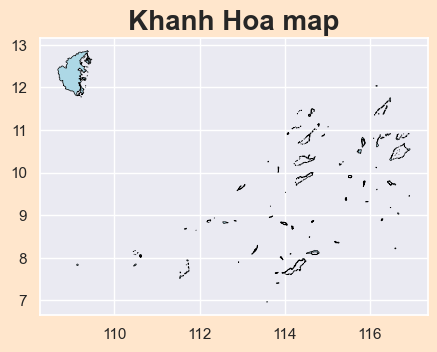

In [ ]:
kh_df = gdf_data1_1[gdf_data1_1['Name'] == 'Khanh Hoa']
# geoplot.polyplot(exploded_nt_df, figsize=(10, 8))
fig, ax = plt.subplots(figsize=(5, 7))
kh_df.plot(ax=ax, edgecolor='black', facecolor='lightblue', linewidth = 0.5)
plt.title('Khanh Hoa map', fontsize = 20, fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

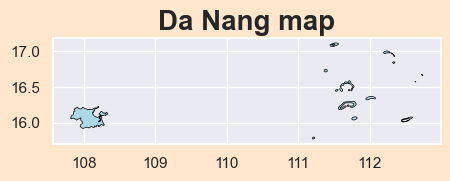

In [ ]:
dn_df = gdf_data1_1[gdf_data1_1['Name'] == 'Da Nang']
# geoplot.polyplot(exploded_nt_df, figsize=(10, 8))
fig, ax = plt.subplots(figsize=(5, 7))
dn_df.plot(ax=ax, edgecolor='black', facecolor='lightblue', linewidth = 0.5)
plt.title('Da Nang map', fontsize = 20, fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

In [ ]:


with open('gadm41_VNM_1.json', encoding='utf-8') as f:
    geo_data1 = json.load(f)


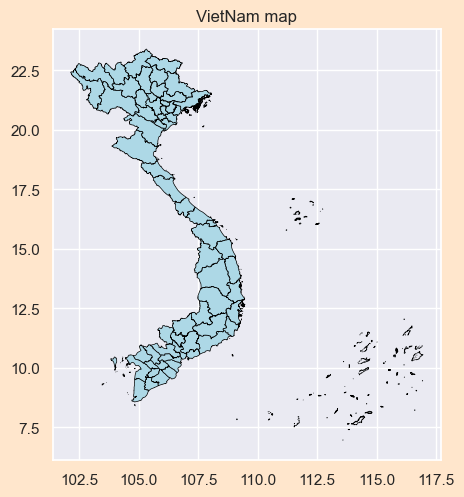

In [ ]:
gdf_data1 = gpd.GeoDataFrame.from_features(geo_data1['features'])

fig, ax = plt.subplots(figsize=(5, 20))
gdf_data1.plot(ax= ax, edgecolor='black', facecolor='lightblue', linewidth = 0.5)
plt.title('VietNam map')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

In [ ]:
gdf_data1 = gpd.read_file('Data/gadm41_VNM_1.json')

In [ ]:
def add_space_between_words(name):
    updated_name = ""
    for i, char in enumerate(name):
        if i > 0 and char.isupper() and name[i-1].islower():
            updated_name += " " + char
        else:
            updated_name += char
    return updated_name

gdf_data1['NAME_1'] = gdf_data1['NAME_1'].apply(add_space_between_words)


0            An Giang
1     Bà Rịa-Vũng Tàu
2           Bắc Giang
3             Bắc Kạn
4            Bạc Liêu
           ...       
58           Trà Vinh
59        Tuyên Quang
60          Vĩnh Long
61          Vĩnh Phúc
62            Yên Bái
Name: NAME_1, Length: 63, dtype: object


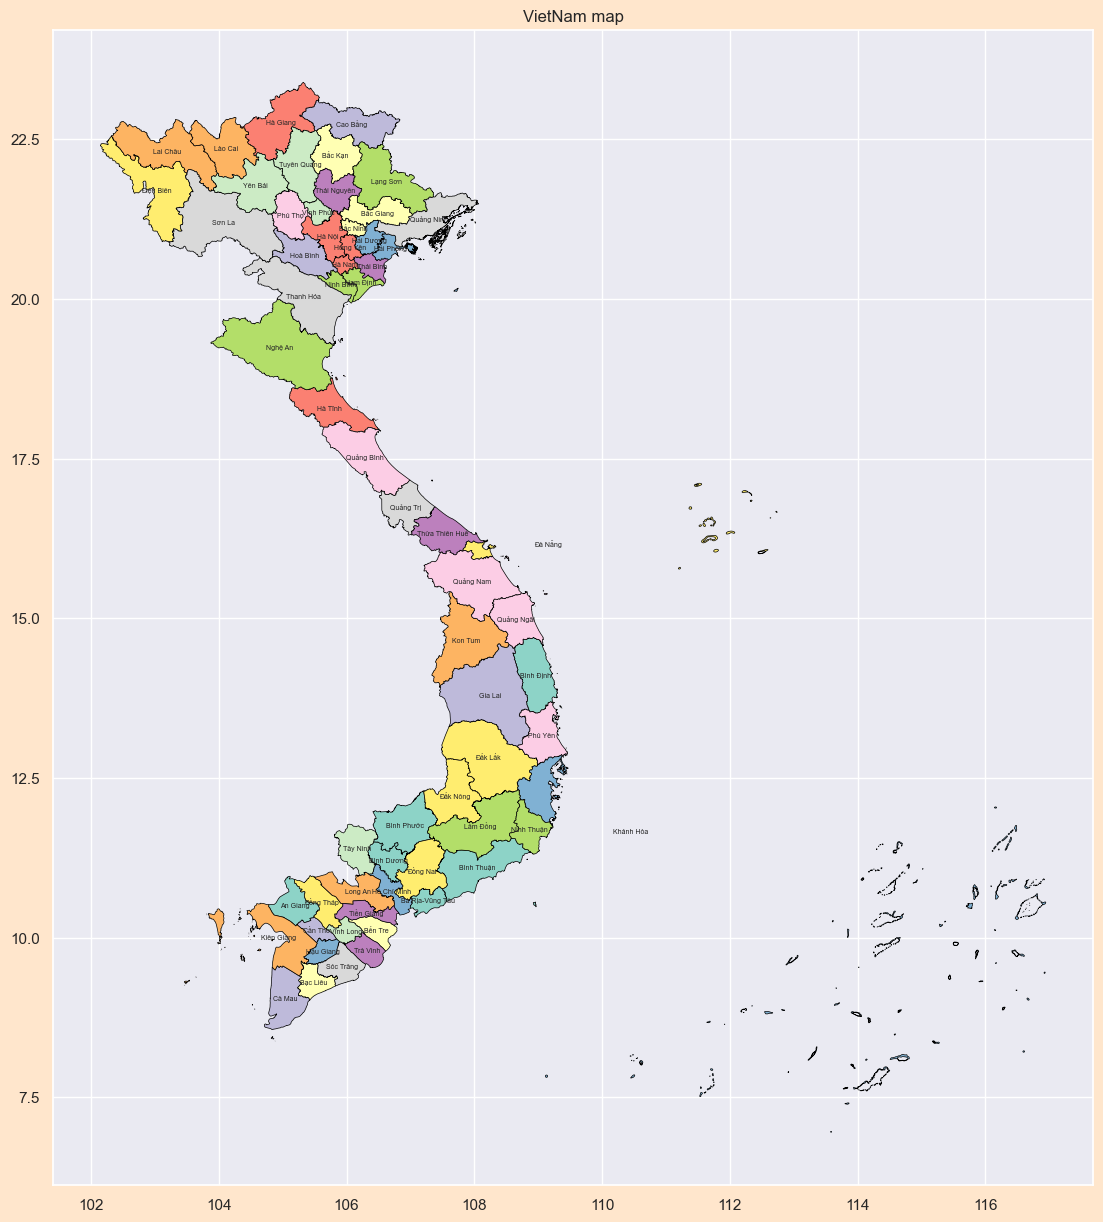

In [ ]:


fig, ax = plt.subplots(figsize=(20, 15))

gdf_data1.plot(ax=ax, edgecolor='black', linewidth = 0.5, column = 'NAME_1',  cmap= colormaps['Set3'])

for x, y, label in zip(gdf_data1.geometry.centroid.x, gdf_data1.geometry.centroid.y, gdf_data1['NAME_1']):
    ax.text(x, y, label, fontsize = 5, horizontalalignment='center', verticalalignment='center')

plt.title('VietNam map')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()


In [ ]:
nt_df = gdf_data1[gdf_data1['VARNAME_1'] == 'NinhThuan']

C:\Users\DELL\AppData\Local\Temp\ipykernel_14628\4087190953.py:3: FutureWarning:

Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.



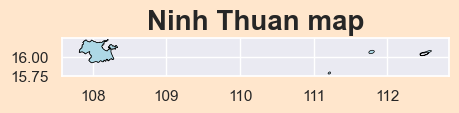

In [ ]:
# geoplot.polyplot(exploded_nt_df, figsize=(10, 8))
fig, ax = plt.subplots(figsize=(5, 7))
nt_df.plot(ax=ax, edgecolor='black', facecolor='lightblue', linewidth = 0.5)
plt.title('Ninh Thuan map', fontsize = 20, fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

In [ ]:
fig = px.choropleth_mapbox(
    nt_df,
    geojson='geometry',
    locations = 'NAME_1',
    color='VARNAME_1',  # Replace with the actual column you want to use for coloring
    mapbox_style="carto-positron",
    center={"lat": nt_df.geometry.centroid.y.mean(), "lon": nt_df.geometry.centroid.x.mean()},
    zoom= 5,
    opacity=0.5,
    hover_name='NAME_1',  # Replace with the actual column you want to display on hover
    # line_color='black',  # Set the outline color to black
    color_continuous_scale='Viridis',
)

# Show the interactive map
fig.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14628\3150928596.py:7: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




## **Level02**

In [35]:

with open('Data/gadm41_VNM_2.json', encoding='utf-8') as f:
    geo_data2 = json.load(f)


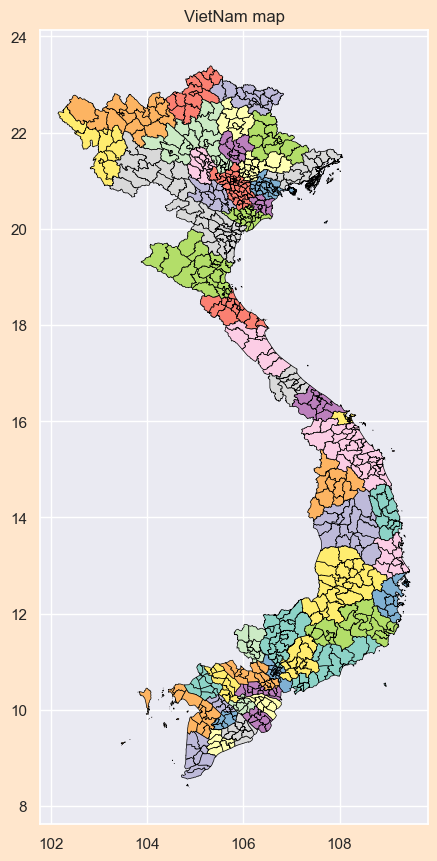

In [37]:
gdf_data2 = gpd.GeoDataFrame.from_features(geo_data2['features'])
gdf_data2

fig, ax = plt.subplots(figsize=(5, 20))
gdf_data2.plot(ax= ax, edgecolor='black', facecolor='lightblue', linewidth = 0.5, column = 'NAME_1', cmap= colormaps['Set3'] )
plt.title('VietNam map')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

In [ ]:
gdf_data2['NAME_1'].unique()

array(['AnGiang', 'BàRịa-VũngTàu', 'BắcGiang', 'BắcKạn', 'BạcLiêu',
       'BắcNinh', 'BếnTre', 'BìnhĐịnh', 'BìnhDương', 'BìnhPhước',
       'BìnhThuận', 'CàMau', 'CầnThơ', 'CaoBằng', 'ĐàNẵng', 'ĐắkLắk',
       'ĐắkNông', 'ĐiệnBiên', 'ĐồngNai', 'ĐồngTháp', 'GiaLai', 'HàGiang',
       'HàNam', 'HàNội', 'HàTĩnh', 'HảiDương', 'HảiPhòng', 'HậuGiang',
       'HồChíMinh', 'HoàBình', 'HưngYên', 'KhánhHòa', 'KiênGiang',
       'KonTum', 'LaiChâu', 'LâmĐồng', 'LạngSơn', 'LàoCai', 'LongAn',
       'NamĐịnh', 'NghệAn', 'NinhBình', 'NinhThuận', 'PhúThọ', 'PhúYên',
       'QuảngBình', 'QuảngNam', 'QuảngNgãi', 'QuảngNinh', 'QuảngTrị',
       'SócTrăng', 'SơnLa', 'TâyNinh', 'TháiBình', 'TháiNguyên',
       'ThanhHóa', 'ThừaThiênHuế', 'TiềnGiang', 'TràVinh', 'TuyênQuang',
       'VĩnhLong', 'VĩnhPhúc', 'YênBái'], dtype=object)

In [41]:
nt_df_data2 = gdf_data2[gdf_data2['NAME_1'] == 'NinhThuận']
nt_df_data2

,geometry,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2
479,"MULTIPOLYGON (((108.98280 11.77120, 108.98240 ...",VNM.43.1_1,VNM,Vietnam,VNM.43_1,NinhThuận,NA,BácÁi,BacAi,NA,Huyện,District,NA,VN.HG.QB
480,"MULTIPOLYGON (((109.14320 11.58240, 109.14600 ...",VNM.43.2_1,VNM,Vietnam,VNM.43_1,NinhThuận,NA,NinhHải,NinhHai,NA,Huyện,District,NA,VN.TH.QH
481,"MULTIPOLYGON (((108.98440 11.48960, 108.98800 ...",VNM.43.3_1,VNM,Vietnam,VNM.43_1,NinhThuận,NA,NinhPhước,NinhPhuoc,NA,Huyện,District,NA,VN.TH.QS
482,"MULTIPOLYGON (((108.64230 11.55030, 108.58270 ...",VNM.43.4_1,VNM,Vietnam,VNM.43_1,NinhThuận,NA,NinhSơn,NinhSon,NA,Huyện,District,NA,VN.HG.QG
483,"MULTIPOLYGON (((109.02430 11.53750, 109.02580 ...",VNM.43.5_1,VNM,Vietnam,VNM.43_1,NinhThuận,NA,PhanRang-ThápChàm,PhanRang-ThapCham,NA,Thànhphố,City,NA,VN.TT.QD
484,"MULTIPOLYGON (((109.11100 11.62750, 109.10050 ...",VNM.43.6_1,VNM,Vietnam,VNM.43_1,NinhThuận,NA,ThuậnBắc,ThuanBac,NA,Huyện,District,NA,VN.QG.QN
485,"MULTIPOLYGON (((108.86630 11.48780, 108.87370 ...",VNM.43.7_1,VNM,Vietnam,VNM.43_1,NinhThuận,NA,ThuậnNam,ThuanNam,NA,Huyện,District,NA,VN.QB.QN


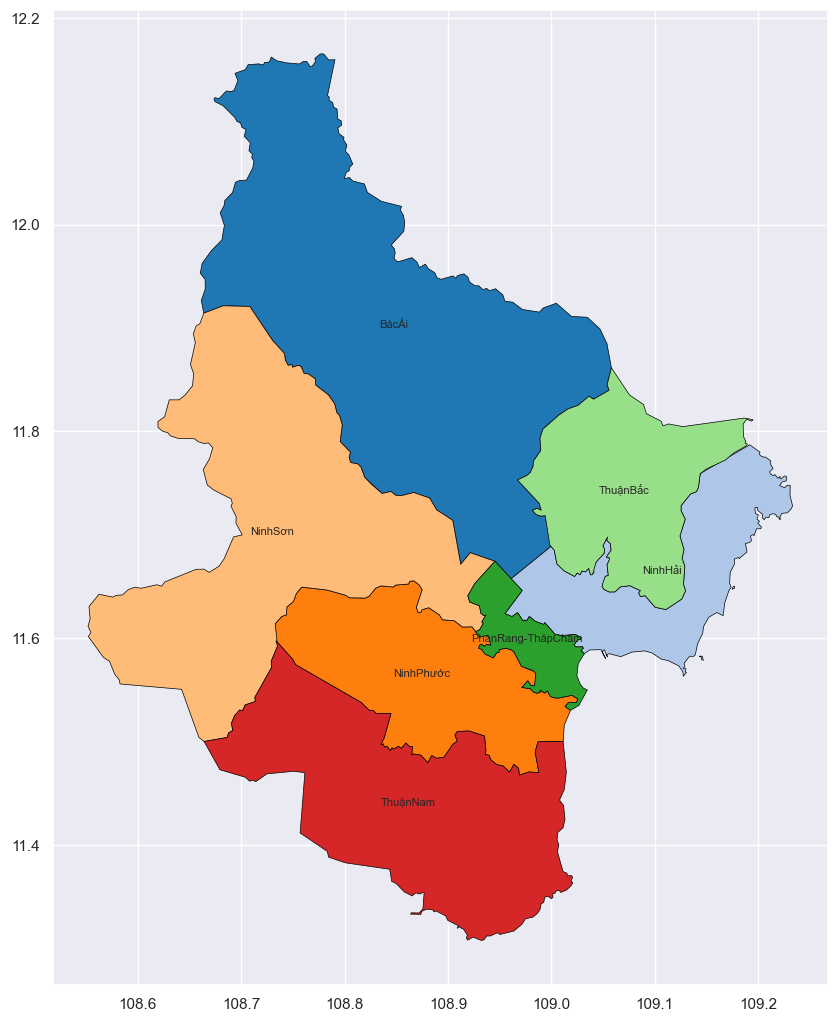

In [42]:

fig, ax = plt.subplots(figsize=(10, 15))

colors = plt.cm.tab20(range(len(nt_df_data2)))
cmap = ListedColormap(colors)
nt_df_data2.plot(ax=ax, edgecolor='black', facecolor='lightblue', linewidth = 0.5, cmap = cmap)

unique_labels = set()
for x, y, label in zip(nt_df_data2.geometry.centroid.x, nt_df_data2.geometry.centroid.y, nt_df_data2['NAME_2']):
    if label not in unique_labels:
        ax.text(x, y, label, fontsize=8, horizontalalignment='center', verticalalignment='center')
        unique_labels.add(label)

plt.show()

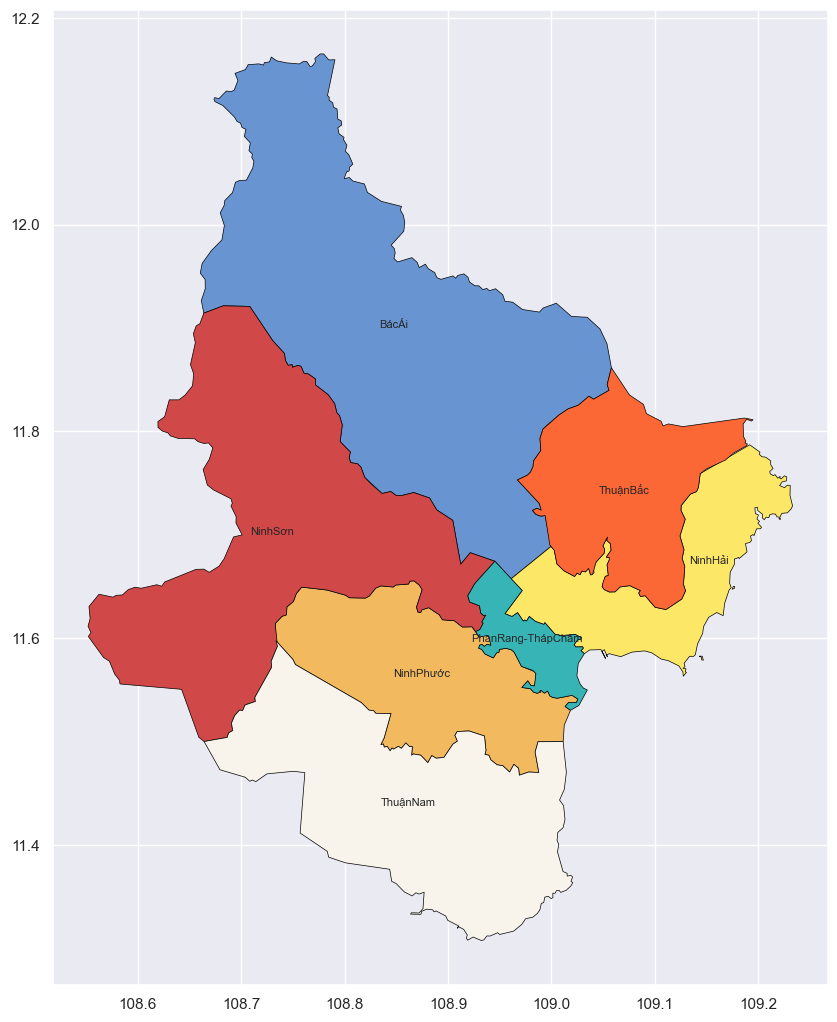

In [43]:
fig, ax = plt.subplots(figsize=(10, 15))

custom_colors = {
    'BácÁi': '#6895D2',
    'NinhHải': '#FDE767',
    'NinhPhước': '#F3B95F',
    'NinhSơn':'#D04848',
    'PhanRang-ThápChàm':'#37B5B6',
    'ThuậnBắc':'#FC6736',
    'ThuậnNam': '#F8F4EC',
}

# Plot the GeoDataFrame with customized colors for each Multipolygon
nt_df_data2.plot(ax = ax,  edgecolor='black', linewidth=0.5,
                facecolor=[custom_colors.get(name) for name in nt_df_data2['NAME_2']])

unique_labels = set()
for polygon, label in zip(nt_df_data2.geometry, nt_df_data2['NAME_2']):
    centroid = polygon.centroid
    
    if centroid.within(polygon):
        ax.text(centroid.x, centroid.y, label, fontsize=8, horizontalalignment='center', verticalalignment='center')
    else: 
        # Find a point inside the polygon
        inside_point = polygon.representative_point()
        ax.text(inside_point.x, inside_point.y, label, fontsize=8, ha='center', va='center')


plt.show()



In [38]:
dl_df_data2 = gdf_data2[gdf_data2['NAME_1'] == 'ĐắkLắk']
dl_df_data2

,geometry,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2
139,"MULTIPOLYGON (((107.97200 12.72560, 107.98380 ...",VNM.15.1_1,VNM,Vietnam,VNM.15_1,ĐắkLắk,NA,BuônĐôn,BuonDon,NA,Huyện,District,NA,NA
140,"MULTIPOLYGON (((108.03270 12.56610, 108.01800 ...",VNM.15.2_1,VNM,Vietnam,VNM.15_1,ĐắkLắk,NA,BuônMaThuột,BuonMaThuot,NA,Thànhphố,City,NA,VN.LD.DH
141,"MULTIPOLYGON (((108.21150 12.66150, 108.21530 ...",VNM.15.3_1,VNM,Vietnam,VNM.15_1,ĐắkLắk,NA,CưKuin,CuKuin,NA,Huyện,District,NA,NA
142,"MULTIPOLYGON (((108.15770 12.72030, 108.15640 ...",VNM.15.4_1,VNM,Vietnam,VNM.15_1,ĐắkLắk,NA,CưM'gar,CuM'gar,NA,Huyện,District,NA,NA
143,"MULTIPOLYGON (((108.08910 13.06580, 108.08840 ...",VNM.15.5_1,VNM,Vietnam,VNM.15_1,ĐắkLắk,NA,EaH'leo,EaH'leo,NA,Huyện,District,NA,VN.LD.DL
144,"MULTIPOLYGON (((108.65860 12.71290, 108.67240 ...",VNM.15.6_1,VNM,Vietnam,VNM.15_1,ĐắkLắk,NA,EaKar,EaKar,NA,Huyện,District,NA,VN.LD.DT
145,"MULTIPOLYGON (((107.93690 12.98370, 107.93290 ...",VNM.15.7_1,VNM,Vietnam,VNM.15_1,ĐắkLắk,NA,EaSúp,EaSup,NA,Huyện,District,NA,VN.QM.DL
146,"MULTIPOLYGON (((108.03910 12.56180, 108.04830 ...",VNM.15.8_1,VNM,Vietnam,VNM.15_1,ĐắkLắk,NA,KrôngANa,KrongANa,NA,Huyện,District,NA,VN.TY.DT
147,"MULTIPOLYGON (((108.67270 12.43150, 108.67260 ...",VNM.15.9_1,VNM,Vietnam,VNM.15_1,ĐắkLắk,NA,KrôngBông,KrongBong,NA,Huyện,District,NA,VN.GL.DD
148,"MULTIPOLYGON (((108.27640 12.99190, 108.27590 ...",VNM.15.10_1,VNM,Vietnam,VNM.15_1,ĐắkLắk,NA,KrôngBúk,KrongBuk,NA,Huyện,District,NA,VN.KT.DG


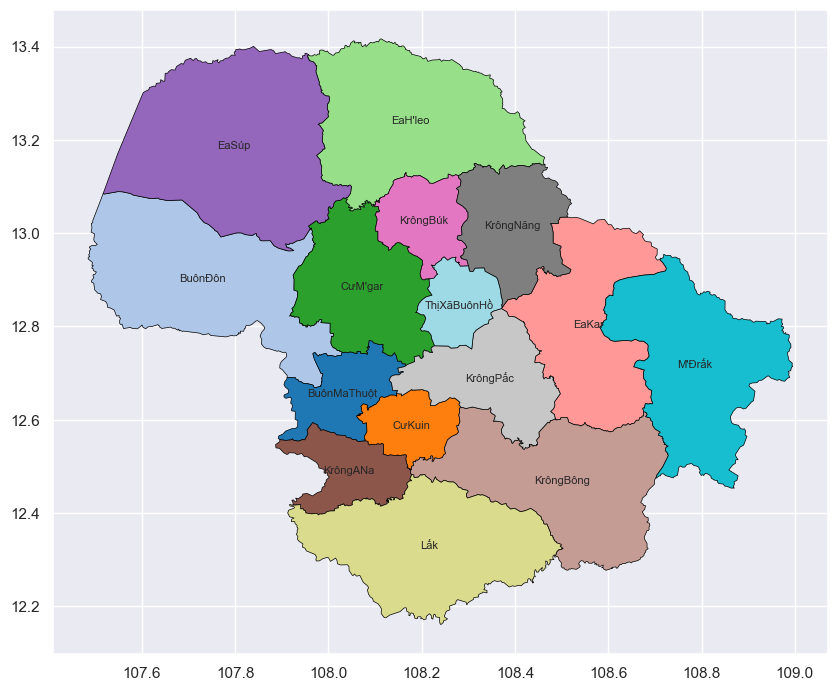

In [39]:

fig, ax = plt.subplots(figsize=(10, 15))


dl_df_data2.plot(ax=ax, edgecolor='black', facecolor='lightblue', linewidth = 0.5,column = 'NAME_2', cmap = colormaps['tab20'])

unique_labels = set()
for polygon, label in zip(dl_df_data2.geometry, dl_df_data2['NAME_2']):
    centroid = polygon.centroid
    if centroid.within(polygon):
        ax.text(centroid.x, centroid.y, label, fontsize=8, ha='center', va='center')
    else:

        interior_point = polygon.representative_point()
        ax.text(interior_point.x, interior_point.y, label, fontsize=8, ha='center', va='center')

plt.show()

##  **Level03**

In [ ]:
with open('gadm41_VNM_3.json', encoding='utf-8') as f:
    geo_data3 = json.load(f)


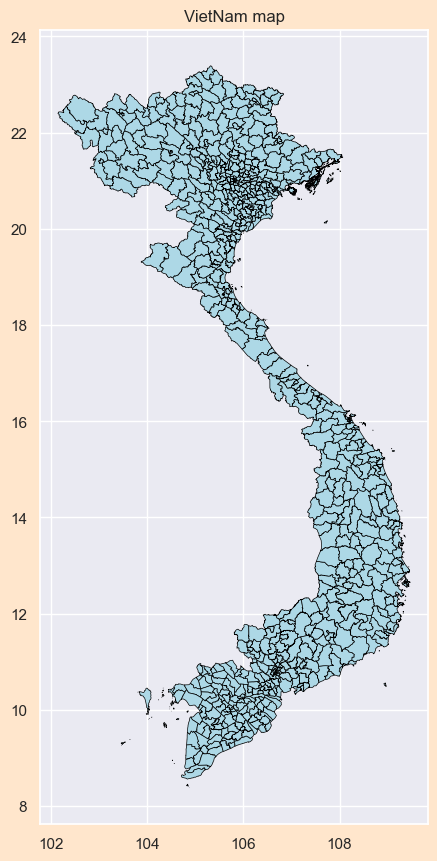

In [ ]:
gdf_data3 = gpd.GeoDataFrame.from_features(geo_data3['features'])

fig, ax = plt.subplots(figsize=(5, 20))
gdf_data2.plot(ax= ax, edgecolor='black', facecolor='lightblue', linewidth = 0.5)
plt.title('VietNam map')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

In [ ]:
nt_df_data3 = gdf_data3[gdf_data3['NAME_1'] == 'NinhThuận']
nt_df_data3

,geometry,GID_3,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3
7287,"MULTIPOLYGON (((108.85510 12.01760, 108.85400 ...",VNM.43.1.1_1,VNM,Vietnam,VNM.43_1,NinhThuận,NA,VNM.43.1_1,BácÁi,NA,PhướcBình,PhuocBinh,NA,Xã,Ward,NA,NA
7288,"MULTIPOLYGON (((108.87180 11.81150, 108.87840 ...",VNM.43.1.2_1,VNM,Vietnam,VNM.43_1,NinhThuận,NA,VNM.43.1_1,BácÁi,NA,PhướcChính,PhuocChinh,NA,Xã,Ward,NA,NA
7289,"MULTIPOLYGON (((108.90240 11.94940, 108.90490 ...",VNM.43.1.3_1,VNM,Vietnam,VNM.43_1,NinhThuận,NA,VNM.43.1_1,BácÁi,NA,PhướcĐại,PhuocDai,NA,Xã,Ward,NA,NA
7290,"MULTIPOLYGON (((108.66380 11.91430, 108.66140 ...",VNM.43.1.4_1,VNM,Vietnam,VNM.43_1,NinhThuận,NA,VNM.43.1_1,BácÁi,NA,PhướcHòa,PhuocHoa,NA,Xã,Ward,NA,NA
7291,"MULTIPOLYGON (((108.84820 11.97660, 108.84900 ...",VNM.43.1.5_1,VNM,Vietnam,VNM.43_1,NinhThuận,NA,VNM.43.1_1,BácÁi,NA,PhướcTân,PhuocTan,NA,Xã,Ward,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,"MULTIPOLYGON (((108.98720 11.49960, 109.01150 ...",VNM.43.7.4_1,VNM,Vietnam,VNM.43_1,NinhThuận,NA,VNM.43.7_1,ThuậnNam,NA,PhướcDinh,PhuocDinh,NA,Xã,Ward,NA,NA
7348,"MULTIPOLYGON (((108.78330 11.39350, 108.75700 ...",VNM.43.7.5_1,VNM,Vietnam,VNM.43_1,NinhThuận,NA,VNM.43.7_1,ThuậnNam,NA,PhướcHà,PhuocHa,NA,Xã,Ward,NA,NA
7349,"MULTIPOLYGON (((108.84370 11.37620, 108.80100 ...",VNM.43.7.6_1,VNM,Vietnam,VNM.43_1,NinhThuận,NA,VNM.43.7_1,ThuậnNam,NA,PhướcMinh,PhuocMinh,NA,Xã,Ward,NA,NA
7350,"MULTIPOLYGON (((108.90900 11.50950, 108.92050 ...",VNM.43.7.7_1,VNM,Vietnam,VNM.43_1,NinhThuận,NA,VNM.43.7_1,ThuậnNam,NA,PhướcNam,PhuocNam,NA,Xã,Ward,NA,NA


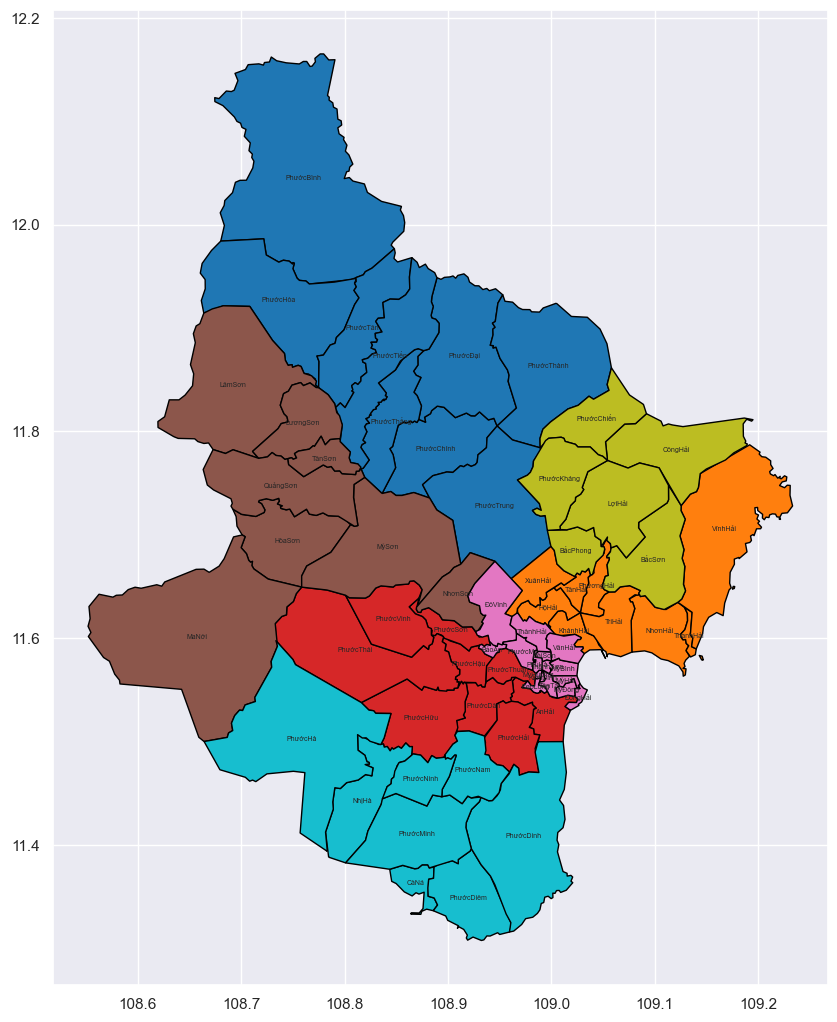

In [ ]:

fig, ax = plt.subplots(figsize=(10, 15))
nt_df_data3.plot(ax=ax, edgecolor='black', linewidth=1, column = 'NAME_2')
unique_labels = set()

# Add 'NAME_2' labels for each Multipolygon
for x, y, label in zip(nt_df.geometry.centroid.x, nt_df.geometry.centroid.y, nt_df['NAME_3']):
    if label not in unique_labels:
        ax.text(x, y, label, fontsize=5,horizontalalignment='center', verticalalignment='center' )
        unique_labels.add(label)
plt.show()